**Session 2: Genetic Algorithm**

This practical session provides the complete implementation of a genetic algorithm.

Feedback may be sent to Alexandre Bergel (abergel@dcc.uchile.cl) 

Integrantes del grupo:


*   Integrante 1
*   Integrante 2
*   Integrante 3
*   Integrante 4

The class `GA` given above provides all the necessary to use genetic algorithm to solve a particular problem. 

In [ ]:
import copy
import random

import numpy as np
import string

# Define the main class of the genetic algorithm
class GA:
    # pop_size is the size of the population. E.g., 1000
    # mutation_rate is the rate of a gene mutation. E.g., 0.1
    # fitness is a function that takes an individual as argument. E.g. lambda genes: sum(collections.Counter(genes))
    # individual_factory is a lambda that creates an individual. E.g., lambda : [ random.randint(0,10) for i in range(4) ]
    # gene_factory is a function that produces a new gene
    # termination_condition is the termination condition that takes as argument the fitness of the best element. If it returns True, then the algorithm ends
    #   E.g., lambda fitness : fitness >= 3
    # max_iter is the maximum number of iterations
    def __init__(self, pop_size, mutation_rate, fitness, individual_factory, gene_factory, termination_condition,
                 max_iter=100, silent=False):
        self.population_size = pop_size
        self.mutation_rate = mutation_rate
        self.fitness_function = fitness
        self.individualFactory = individual_factory
        self.max_iterations = max_iter
        self.termination_condition = termination_condition
        self.gene_factory = gene_factory
        self.population = list()
        self.individual_fitnesses = list()
        self.silent = silent

    # main method to actually run the algorithm
    # return a tupple best_fitness_list, avg_list, best_individual
    def run(self):
        current_iteration = 0
        best_fitness_list = list()
        avg_list = list()

        # We generate the initial population
        self.population = self.generate_population()

        # We compute all the fitnesses. It is a collection of fitness values, of the same size than the population
        self.individual_fitnesses = self.get_fitness(self.population)

        # We get the best_individual of the current population
        best_individual = self.get_best_individual()

        # We loop if we have not reached the maximum number of iterations and if the termination condition is not met
        while current_iteration <= self.max_iterations and not self.termination_condition(self.fitness_function(best_individual)):
            self.log("iter {} of {}".format(current_iteration, self.max_iterations))

            best_fitness_list.append(max(self.individual_fitnesses))
            avg_list.append(np.mean(self.individual_fitnesses))

            self.log("best is: {}\nwith {} acc. Avg: {}".format(best_individual, best_fitness_list[-1], avg_list[-1]))

            # we create a new population
            new_population = []
            for _ in range(self.population_size):
                parent1 = self.tournament(self.population)
                parent2 = self.tournament(self.population)
                new_population.append(self.create_new_individual(parent1, parent2))

            self.population = new_population
            self.individual_fitnesses = self.get_fitness(self.population)
            current_iteration += 1
            best_individual = self.get_best_individual()
        
        last_fitness = self.get_fitness(self.population)
        best_individual = self.population[last_fitness.index(max(last_fitness))]

        best_fitness_list.append(max(last_fitness))
        avg_list.append(np.mean(last_fitness))
        
        self.log("best found is: {}\nwith {} acc. Avg: {}".format(best_individual, best_fitness_list[-1], avg_list[-1]))

        return best_fitness_list, avg_list, best_individual

     
    # Logging 
    def log(self, aString):
        if not self.silent:
            print(aString)
        
    # return the best individual of the current population
    def get_best_individual(self):
        return self.population[self.individual_fitnesses.index(max(self.individual_fitnesses))]

    # generate the population, made of individuals
    def generate_population(self):
        _population = list()
        for _ in range(self.population_size):
            _population.append(self.individualFactory())
        return _population

    # Return the list of the fitness values for the population
    def get_fitness(self, aPopulation):
        return list(map(self.fitness_function, aPopulation))

    # Obtain the best individual from a tournament on the population
    def tournament(self, aPopulation, k = 5):
        best = None
        best_fitness = -1
        for _ in range(1, k):
            ind = random.choice(aPopulation)
            if(best is None or (self.fitness_function(ind) > best_fitness)):
                best = ind
                best_fitness = self.fitness_function(ind)
        return best

    # create a new individual from two parents elements
    def create_new_individual(self, parent1, parent2):
        final_child = self.crossover(parent1, parent2)
        # mutation
        if random.random() < self.mutation_rate:
            self.mutate(final_child)
        return final_child

    # crossover operation
    # crossover([1,2,3,4], [10,20,30,40])
    # => [1, 20, 30, 40]
    def crossover(self, individual1, individual2):
        _tmp = random.randint(1, len(individual1))
        return individual1[:_tmp] + individual2[_tmp:]

    # Mutate an individual
    # Note that this method does a side effect. I.e., it does not create a new individual
    def mutate(self, an_individual):
        index = random.randrange(len(an_individual))
        an_individual[index] = self.gene_factory()


Consider the problem of finding a bit sequence:

In [ ]:
#  ____  _ _                                              
# |  _ \(_) |                                             
# | |_) |_| |_   ___  ___  __ _ _   _  ___ _ __   ___ ___ 
# |  _ <| | __| / __|/ _ \/ _` | | | |/ _ \ '_ \ / __/ _ \
# | |_) | | |_  \__ \  __/ (_| | |_| |  __/ | | | (_|  __/
# |____/|_|\__| |___/\___|\__, |\__,_|\___|_| |_|\___\___|
#                            | |                          
#                            |_|                          

import random
random.seed(42)

SEQUENCE_OF_BITS_TO_FIND = '1010101010101010101'
NUMBER_OF_GENES = len(SEQUENCE_OF_BITS_TO_FIND)

def fitness_bits(anIndividual):
    result = 0
    for a,b in zip(anIndividual, SEQUENCE_OF_BITS_TO_FIND):
        if (a==b):
            result = result + 1
    return result

def gene_factory():
    if(random.random() > 0.5):
        return '1'
    else:
        return '0'

def sequence_bit_factory():
    return [ gene_factory() for i in range(NUMBER_OF_GENES)]

ga = GA(pop_size=100,mutation_rate=0.1,fitness=fitness_bits, 
	individual_factory=sequence_bit_factory, gene_factory=gene_factory, 
	termination_condition = lambda f : f == NUMBER_OF_GENES, silent = False)

best_fitness_list, avg_list, best_individual = ga.run()
print(best_fitness_list)

iter 0 of 100
best is: ['1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0']
with 15 acc. Avg: 9.71
iter 1 of 100
best is: ['1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1']
with 17 acc. Avg: 11.8
iter 2 of 100
best is: ['1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1']
with 17 acc. Avg: 13.49
iter 3 of 100
best is: ['1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1']
with 18 acc. Avg: 15.29
best found is: ['1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1']
with 19 acc. Avg: 16.66
[15, 17, 17, 18, 19]


The script above contains a few parameters that control the execution of the algorithm. In particular, the population size (`pop_size`), the mutation rate (`mutation_rate`) are two parameters that it is easy to experiment with. 

In this first exercise, you need to build a hotmap in which vertically you have variations of the population and horizontally the mutation rate. Here is an example of building a hotmap

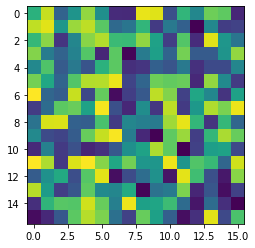

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# This example uses random values
a = np.random.random((16, 16))
plt.imshow(a, interpolation='nearest')
plt.show()

**EXERCISE**: Build a hotmap by varying the mutation rate and the population size of the bit sequence example. What can you comment on the hotmap? What are the informal conclusion you can draw from it?

In [ ]:
#  _    _       _                         
# | |  | |     | |                        
# | |__| | ___ | |_ _ __ ___   __ _ _ __  
# |  __  |/ _ \| __| '_ ` _ \ / _` | '_ \ 
# | |  | | (_) | |_| | | | | | (_| | |_) |
# |_|  |_|\___/ \__|_| |_| |_|\__,_| .__/ 
#                                  | |    
#                                  |_|    
#
# WRITE YOUR ANSWER HERE


We will now do another exercise,  close to what we have seen during the lecture. 

**EXERCISE**: Use the genetic algorithm to search for the string `helloworld`, in which each gene is a character.

In [ ]:
#   ______ _           _ _              __          __           _ 
#  |  ____(_)         | (_)             \ \        / /          | |
#  | |__   _ _ __   __| |_ _ __   __ _   \ \  /\  / /__  _ __ __| |
#  |  __| | | '_ \ / _` | | '_ \ / _` |   \ \/  \/ / _ \| '__/ _` |
#  | |    | | | | | (_| | | | | | (_| |    \  /\  / (_) | | | (_| |
#  |_|    |_|_| |_|\__,_|_|_| |_|\__, |     \/  \/ \___/|_|  \__,_|
#                                 __/ |                            
#                                |___/                             
# WRITE YOUR ANSWER HERE


**EXERCISE**: Plot the evolution of the fitness function across generations

In [ ]:
#  ______ _ _                                                   
# |  ____(_) |                                                  
# | |__   _| |_ _ __   ___  ___ ___    ___ _   _ _ ____   _____ 
# |  __| | | __| '_ \ / _ \/ __/ __|  / __| | | | '__\ \ / / _ \
# | |    | | |_| | | |  __/\__ \__ \ | (__| |_| | |   \ V /  __/
# |_|    |_|\__|_| |_|\___||___/___/  \___|\__,_|_|    \_/ \___|
#                                                               
# WRITE YOUR ANSWER HERE


The knapsack problem is a well-known problem in combinatorial optimization. It can be summarized as follows: given a set of items, each having a value and a weight, determine the number of each item to include in a collection, such that (i) the total weight is less or equal a given limit and (ii) the total value is as large as possible.

![texto alternativo](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Knapsack.svg/250px-Knapsack.svg.png)

[Description and example of the Knapsack problem](https://en.wikipedia.org/wiki/Knapsack_problem)

In this exercise, we will consider only the _unbounded knapsack problem_ variant of the problem.

**EXERCISE**: Use the Genetic Algorithm to solve the Knapsack Problem described in the Wikipedia page

In [ ]:
#  _    _       _       _                                     _    
# | |  | |     | |     | |                                   | |   
# | |  | |_ __ | |__   | | ___ __   __ _ _ __  ___  __ _  ___| | __
# | |  | | '_ \| '_ \  | |/ / '_ \ / _` | '_ \/ __|/ _` |/ __| |/ /
# | |__| | | | | |_) | |   <| | | | (_| | |_) \__ \ (_| | (__|   < 
#  \____/|_| |_|_.__/  |_|\_\_| |_|\__,_| .__/|___/\__,_|\___|_|\_\
#                                       | |                        
#                                       |_|                        
# WRITE YOUR ANSWER HERE


**EXERCISE**: How would you solve the 0-1 knapsack problem variant?

The 0-1 knapsack variant consist in prohibiting an item to be included more than once in the bag. Therefore, the problem is reduced to define, for each item, if it is present in the bag or not.

In [ ]:
#   ___        __   _                                     _    
#  / _ \      /_ | | |                                   | |   
# | | | |______| | | | ___ __   __ _ _ __  ___  __ _  ___| | __
# | | | |______| | | |/ / '_ \ / _` | '_ \/ __|/ _` |/ __| |/ /
# | |_| |      | | |   <| | | | (_| | |_) \__ \ (_| | (__|   < 
#  \___/       |_| |_|\_\_| |_|\__,_| .__/|___/\__,_|\___|_|\_\
#                                   | |                        
#                                   |_|                        
# WRITE YOUR ANSWER HERE

The following example is about helping a robot to find the exit. Run the following code:

In [ ]:
#  ______ _           _ _                         _ _
# |  ____(_)         | (_)                       (_) |
# | |__   _ _ __   __| |_ _ __   __ _    _____  ___| |_
# |  __| | | '_ \ / _` | | '_ \ / _` |  / _ \ \/ / | __|
# | |    | | | | | (_| | | | | | (_| | |  __/>  <| | |_
# |_|    |_|_| |_|\__,_|_|_| |_|\__, |  \___/_/\_\_|\__|
#                                __/ |
#                               |___/


import random
random.seed(42)

import numpy as np
import string

#Useful for estimating the distance between the robot and exit
import math

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'


WALL_CHARACTER = '#'
ROBOT_CHARACTER = '🤖'
FOOD_CHARACTER = '🍉'
EXIT_CHARACTER = '🚪'
PATH_CHARACTER = '.'
EMPTY_CHARACTER = '󠀠󠀠󠀠 '
MAXIMUM_NUMBER_STEPS = 20
MAP_SIZE = 10
START = (1, 1)
END = (MAP_SIZE - 2, MAP_SIZE - 2)


def set_map(aMap, coordinate, character):
    #if (aMap[coordinate[0]][coordinate[1]] != EMPTY_CHARACTER):
    #    breakpoint()
    aMap[coordinate[0]][coordinate[1]] = character


def get_map(aMap, coordinate):
    return aMap[coordinate[0]][coordinate[1]]


def print_hero(aMap, coordinate):
    set_map(aMap, coordinate, ROBOT_CHARACTER)


def print_exit(aMap, coordinate):
    set_map(aMap, coordinate, EXIT_CHARACTER)


def create_map():
    _t = [[' ' for _ in range(MAP_SIZE)] for _ in range(MAP_SIZE)]
    for i in range(MAP_SIZE):
        _t[i][0] = WALL_CHARACTER
        _t[i][MAP_SIZE-1] = WALL_CHARACTER
        _t[0][i] = WALL_CHARACTER
        _t[MAP_SIZE-1][i] = WALL_CHARACTER
    print_hero(_t, START)
    print_exit(_t, END)
    return _t

def print_map(aMap):
	for row in aMap:
		for column in row:
			print(bcolors.OKBLUE + column + bcolors.ENDC, end='')
		print('')

def translate_direction(direction):
    if(direction == 'up'):
        return (0, -1)
    if(direction == 'down'):
        return (0, 1)
    if(direction == 'left'):
        return (-1, 0)
    if(direction == 'right'):
        return (1, 0)

def sum_tuple(t1, t2):
    return tuple(map(lambda a, b: a + b, t1, t2))

def run_path(genes):
    _position = START
    _number_of_steps = 0
    for direction in genes:
        _d = translate_direction(direction)
        if(get_map(MAP, sum_tuple(_position, _d)) != WALL_CHARACTER):
            _position = sum_tuple(_position, _d)
            _number_of_steps += 1
    return _position, _number_of_steps


def trace_path_in_map(aMap, genes): 
    _position = START
    for direction in genes:
        _d = translate_direction(direction)
        if(get_map(MAP, sum_tuple(_position, _d)) != WALL_CHARACTER):
            _position = sum_tuple(_position, _d)
            set_map(aMap, _position, PATH_CHARACTER)

def fitness_distance_to_exit(genes):
    _pos, _number_of_steps = run_path(genes)
    _dx = _pos[0] - END[0]
    _dy = _pos[1] - END[1]
    return - math.sqrt(_dx * _dx + _dy * _dy) #- (_number_of_steps * 0.3)

def gene_factory():
    return random.choice(['up', 'down', 'left', 'right'])

def path_factory():
    return [ gene_factory() for i in range(MAXIMUM_NUMBER_STEPS)]

def add_wall_in(aMap, size = 4, position = None):
    if position is None:
        _px = random.randint(4, MAP_SIZE - 4)
        _py = random.randint(2, MAP_SIZE - 2)
    else:
        _px = position[0]
        _py = position[1]
    for _tx in range(_px - size // 2, _px + size // 2):
        set_map(aMap, (_py, _tx), WALL_CHARACTER)

MAP = create_map()
for _ in range(10):
  add_wall_in(MAP, size = 3)
ga = GA(pop_size=1000, mutation_rate=0.1, fitness=fitness_distance_to_exit, 
        individual_factory=path_factory,
        gene_factory=gene_factory, termination_condition=lambda f: f == 0, 
        max_iter=20)
best_fitness_list, avg_list, best_individual = ga.run()
trace_path_in_map(MAP, best_individual)
print_exit(MAP, END)
print_map(MAP)


iter 0 of 20
best is: ['up', 'left', 'down', 'up', 'up', 'right', 'right', 'right', 'up', 'down', 'down', 'down', 'left', 'left', 'right', 'right', 'down', 'right', 'down', 'down']
with -2.23606797749979 acc. Avg: -7.82086348216999
iter 1 of 20
best is: ['up', 'right', 'up', 'right', 'right', 'down', 'right', 'right', 'down', 'down', 'down', 'down', 'left', 'left', 'right', 'right', 'down', 'right', 'down', 'down']
with -1.0 acc. Avg: -6.5571323390921314
iter 2 of 20
best is: ['up', 'right', 'up', 'right', 'right', 'down', 'right', 'right', 'down', 'down', 'down', 'down', 'left', 'down', 'right', 'down', 'left', 'right', 'left', 'right']
with -1.0 acc. Avg: -5.337335479378708
best found is: ['up', 'right', 'up', 'right', 'right', 'down', 'right', 'right', 'down', 'down', 'down', 'down', 'down', 'right', 'down', 'right', 'left', 'down', 'right', 'down']
with -0.0 acc. Avg: -4.218933492994001
##########
#🤖       #
#. ####  #
#. ###   #
#..      #
# .  ##  #
# ...... #
#  ####..#
#       

**EXERCISES**:
- experiment with different sizes of the map
- add a food in the map and give incentives for the robot to find the food and go to the exit